In [1]:
# Imports
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pvlib import solarposition, location
from IPython.display import display, Math, Markdown
import ipywidgets as wds
#plt.style.use('seaborn-whitegrid')

# Energetica e Fonti Rinnovabili - PoliTo DENERG
# Esercitazione 4.1 - Angoli solari

## Obiettivo di apprentimento
- Imparare a ricavare l’ora solare in uno specifico luogo del pianeta avendo a disposizione: l’ora del luogo, le sue coordinate (latitudine e longitudine, e longitudine del meridiano di riferimento) e il giorno dell’anno.
- Imparare a leggere una carta solare (o diagramma solare) per un dato luogo (per una certa latitudine) e a ricavare graficamente gli angoli solari azimut e altitudine solare essendo noti: il giorno dell’anno e l’ora solare. Ricavare graficamente le ore di alba e tramonto.

## Esercizi
1. Un osservatore si trova a Torino (Latitudine L 45.00 N(+), longitudine l 7.68 E(-)) il giorno 26 Marzo 2021. Sapendo che il meridiano di riferimento per Torino è quello dell’Etna (longitudine standard lstd15.00 E(-)) e che l’orologio segna le ore 10:00, calcolare l’ora solare corrispondente. Nota bene: il 26 Marzo non è attiva l’ora legale!
1. Viene fornito il diagramma solare di Torino (valido per la latitudine 45.00 N). Leggere tramite il diagramma quanto valgono gli angoli solari azimut e altitudine solare, ipotizzando che il giorno dell’anno sia il 26 Marzo 2021 e che l’ora solare sia quella ricavata nell’esercizio (1). Determinare anche l’ora di alba e tramonto per il 30 Marzo utilizzando il diagramma solare fornito. A partire dalle ore solari ottenute, ricavare le ore locali corrispondenti.

### Esercizio 1

#### Dati di input:

In [2]:
# Dati input
L = 45 # Lat [°]
l_local = -7.68 # Long [°]
l_st = -15 # long standard [°]
data = pd.to_datetime('2021-03-26 10:00')
col = 0 # 1 se ora legale, altrimenti 0. Per il 2021 è dal 28 Marzo al 31 ottobre
ora = data.hour+data.minute/60 # [h] in ore decimalidecimali
# Dati ricavati
n = data.dayofyear # Numero identificatico del giorno in esame rispetto all'anno
# Output
display(Markdown(f'$L$ = {L}°; $l_{{local}}$ = {l_local}°; $l_{{st}}$ = {l_st}°; $ora$ = {ora} (+ {col}) h;  $n$ = {n}'))

$L$ = 45°; $l_{local}$ = -7.68°; $l_{st}$ = -15°; $ora$ = 10.0 (+ 0) h;  $n$ = 85

#### Procedimento
L'ora solare in ogni posto si riferisce al tempo preciso in cui il sole attraversa il piano nord-sud equivalente al meridiano del posto (mezzogiorno solare) dove raggiunge anche la culminazione (la massima elevazione, o altitudine). Il tempo solare differisce dall'ora di un comune orologio a causa del fuso orario del meridiano di riferimento e dall'equazione del tempo.  

Per calcolare l'ora solare, o *Solar Time* $ST$, si applica l'equazione seguente:
$$ST = LST + ET + (l_{st}-l_{local})\cdot4 \quad [min] \quad (1)$$
$LST$ è il *Local Standard Time*, cioè l'ora locale riferita al fuso orario in cui si trova l'osservatore (l'ora di orologio). Il fuso orario è una porzione longitudinale della superficie terrestre compresa tra due determinati meridiani che adotta lo stesso orario. Il fuso orario è a sua volta riferito al tempo coordinato universale o tempo civile *UTC*, il fuso orario scelto come riferimento globale (longitudine equivalente nella zona del Meridiano di Greenwich), a partire dal quale sono calcolati tutti i fusi orari del mondo. In Italia si adotta il fuso orario *Central European Time CET* corrispondente a *UTC+1* e riferito al meridiano dell'Etna (-15°). Inoltre, durante il periodo estivo vige l'ora legale, dunque sarà necessario aggiungere un'ora al *CET*. Nel caso in esame, al giorno 30 Marzo 2020 è attiva l'ora legale, per cui:

In [3]:
LST = (ora - col)*60
display(Math(f'LST = ora -{col} = {ora-col} \ h = {round(LST,2)} \min '))

<IPython.core.display.Math object>

L'equazione del tempo $ET$ si calcola con la seguente equazione:
$$ET = 9.87sin(2B)-7.53cos(B)-1.5sin(B) \quad [min] \quad (2)$$
$$B = 360(n-81)/364 \quad [°] \quad (3)$$

L'equazione del tempo è la conseguenza dell'azione combinata tra l'inclinazione dell'asse e l'eccentricità dell'orbita della Terra attorno al Sole. Di seguito la funzione di ET:

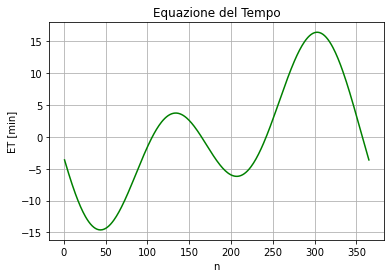

In [4]:
# ET function
nx = np.array([x for x in range(1,366)])
Bx = (360*(nx-81)/364)*np.pi/180
ETy = 9.87*np.sin(2*Bx)-7.53*np.cos(Bx)-1.5*np.sin(Bx)
# declination function
deltay = 23.45*np.sin(np.radians(360/365*(284+nx)))
fig, ax = plt.subplots(1,1,figsize=(6, 4))
fig.canvas.header_visible = False
ax.plot(nx,ETy,c='g')
ax.set_title('Equazione del Tempo')
ax.set_xlabel('n')
ax.set_ylabel('ET [min]')
ax.grid('on')
# ax[1].plot(nx,deltay, c='red')
# ax[1].set_title('Declinazione')
# ax[1].set_xlabel('n')
# ax[1].set_ylabel('$\delta_s$ [°]')

Una rappresentazione visiva dell'effetto dell'equazione del tempo e della declinazione terrestre è l'analemma, cioè una particolare curva geometrica a forma di otto che descrive la posizione del Sole nei diversi giorni dell'anno, alla stessa ora e nella località o meridiano (qui un esempio interattivo: https://www.geogebra.org/classic/vd3qpad8).

Nel giorno in esame, usando le equazioni (2) e (3) otteniamo:

In [5]:
# ET for n
B = 360*(n-81)/364
B_rad = B*np.pi/180
ET = 9.87*np.sin(2*B_rad)-7.53*np.cos(B_rad)-1.5*np.sin(B_rad)
display(Math(f'B = {round(B,2)}° =>  ET = {round(ET,2)} \ min'))

<IPython.core.display.Math object>

L'ultimo argomento dell'equazione (1) è la correzione longitudinale per tenere conto della diversa longitudine dell'osservatore rispetto al meridiano standard, e dove il fattore $4$ sono $min/°$, corrispondente a $60 \ min$ ogni $15°$ (il tempo che impiega la terra a ruotare rispetto la distanza di due meridiani consecutivi).

In [6]:
corr_long = (l_st - l_local)*4
display(Math(f'(l_{{st}}-l_{{local}})\cdot4 = {round(corr_long,2)} \ min'))

<IPython.core.display.Math object>

Dunque, avendo calcolato tutti gli argomenti dell'equazione (1), facendo attenzione a riportarli tutti in minuti, possiamo calcolare l'ora solare $ST$:

In [7]:
ST = LST + ET + corr_long
ST_h = ST/60
ST_hour = int(ST_h)
ST_min = int((ST_h-ST_hour)*60)
display(Math(f'ST = {round(ST,2)} \min => {round(ST/60,2)} \ h => {ST_hour}{{:}}{ST_min}'))

<IPython.core.display.Math object>

### Esercizio 2

L'esercizio viene risolto utilizzando il diagramma solare fornito durante l'esercitazione.

**Soluzione *digital***: 
E' possibile ricostruire il diagramma solare utilizzando librerie specifiche in Python, e.g. *pvlib*. Di seguito un elaborazione del diagramma per la località e la data scelta in input. Il diagramma solare differisce da quello presentato a lezione: i) il sistema di riferimento polare ha come angolo l'azimuth 0-360° in senso orario partendo da Sud, e come raggio lo zenith piuttosto che l'altezza solare; ii) il diagramma è riferito all'orario locale $LST$ (civile, escludendo l'ora legale) e per tale ragione sono presenti gli analemmi necessari per tenere conto dell'ora solare e dunque della reale posizione del sole. Fissata l'ora $LST$, la colorbar ci aiuta ad identificare in quale punto dell'analemma ci troviamo in base al giorno dell'anno, quindi identificando esattamente la declinazione, lo zenith e l'azimuth solare.

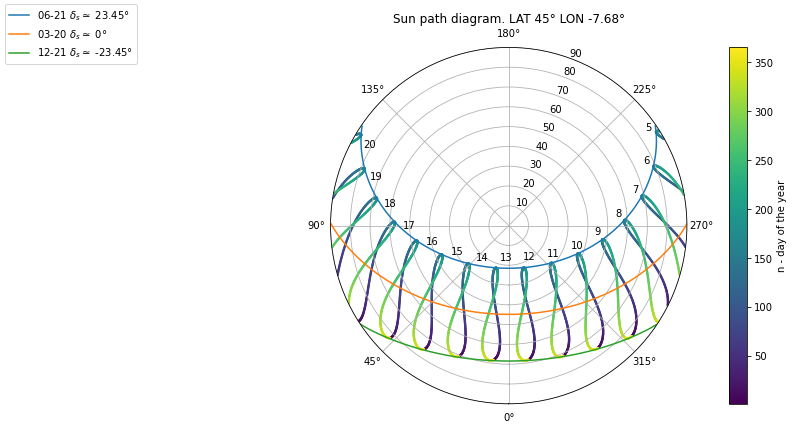

In [8]:
# Sun path diagram per una determinata località
# Per semplicità, utilizzare l'ora locale (non considerando l'ora legale) senza definire la time zone (anche se siamo sempre in CET UTC+1 e CEST UTC+2 nel caso in esame)
year = data.year
# range di un anno
times = pd.date_range(f'{year}-01-01 00:00:00', f'{year+1}-01-01', closed='left', freq='H', tz='UTC')
# calcolo posizione solare
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris') # lo converte sempre in UTC
# rimuovi la notte
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

# Sun path
fig1 = plt.figure(figsize=(12,6))
fig1.canvas.header_visible = False
ax1 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta
corr = -180
# Disegno analemmi
points = ax1.scatter(np.radians(solpos.azimuth + corr), solpos.apparent_zenith,s=2, label=None, c=solpos.index.dayofyear)
ax1.figure.colorbar(points,label='n - day of the year')

# Disegno labels delle ore
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax1.text(np.radians(pos['azimuth'] + corr) - 0.05, pos['apparent_zenith'] - 4, str(hour))
    
# Disengno sun path particolari (soltizi ed equinozi)
# Info 2021: Solstizio 21 giugno 03:32 Solstizio 21 dicembre 15:59 Equinozio 20 marzo 09:37 Equinozio 22 settembre 19:21
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='5min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax1.plot(np.radians(solpos.azimuth + corr), solpos.apparent_zenith, label=label+f' $\delta_s \simeq$ {days[d]}°')

ax1.figure.legend(loc='upper left')

ax1.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
ax1.set_theta_zero_location('S')
ax1.set_theta_direction(-1)
ax1.set_rmax(90)
ax1.set_rlabel_position(200)
fig1.tight_layout()

Nel seguente diagramma si evidenzia la posizione del sole nel giorno e nell'ora considerata, con l'indicazione dell'ora di alba e tramonto. 

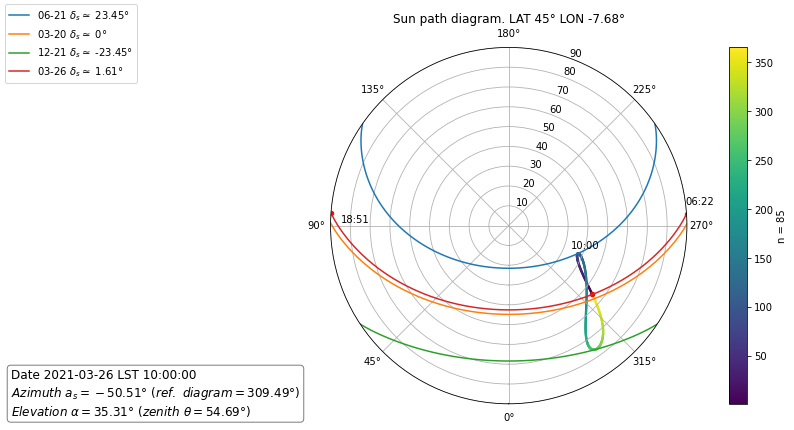

In [9]:
# Posizione sole nel caso studio
time = data-pd.Timedelta(hours=col) # per correggere ora legale

declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi
ETl = pd.to_timedelta(np.array(solarposition.equation_of_time_pvcdrom(n)), unit='minutes')
solar_timel = time + ETl + pd.Timedelta(minutes=(l_st - l_local) * 4) # da verificare UTC

pos = solarposition.get_solarposition(time, L, l_local, method='ephemeris')
azimuth = pos.azimuth[0]
zenith = pos.apparent_zenith[0]
# print(pos.iloc[0])
# print(ET.total_seconds() / 60)
# print(solar_time)

fig2 = plt.figure(figsize=(12,6))
fig2.canvas.header_visible = False
ax2 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta per il grafico
corr = -180
# Analemma per l'ora in esame 
times = pd.date_range(time,time +pd.Timedelta(days=364),freq='D', tz='UTC')
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris')  # lo converte in UTC
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
points = ax2.scatter(np.radians(solpos.azimuth + corr), solpos.apparent_zenith, s=2, label=None,c=np.unique(solpos.index.dayofyear))
ax2.figure.colorbar(points, label = f'n = {n}')
# Posizione sole
ax2.scatter(np.radians(pos.azimuth + corr),pos.apparent_zenith, s=20, label=None, c='red')
# Ora posizione
r = solpos.apparent_zenith
postext = solpos.loc[r.idxmin(), :]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['apparent_zenith']-4, time.strftime('%H:%M'))
# Disengno sun path particolari (soltizi ed equinozi)
color = {'2020-06-21':'tab:blue', '2020-03-20':'tab:orange', '2020-12-21':'tab:green',time.strftime('%Y-%m-%d'):'tab:red'}
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45,time.strftime('%Y-%m-%d'):round(declination,2)}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='1min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['apparent_elevation'] >= 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax2.plot(np.radians(solpos.azimuth + corr), solpos.apparent_zenith, label=label+f' $\delta_s \simeq$ {days[d]}°',c=color[d])

sun_rise_set_transit = solarposition.sun_rise_set_transit_ephem(times,L,l_local).iloc[0]
sunrise = sun_rise_set_transit['sunrise']
sunset = sun_rise_set_transit['sunset']

postext = solpos.iloc[0]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['apparent_zenith'], sunrise.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.apparent_zenith, s=20, label=None, c='red')
postext = solpos.iloc[-1]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['apparent_zenith']-5, sunset.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.apparent_zenith, s=20, label=None, c='red')
ax2.figure.legend(loc='upper left')

textstr = '\n'.join((f'Date {time.date()} LST {time.time()}',
    r'$Azimuth \ a_s=%.2f ° \ (ref. \ diagram = %.2f °)$' % (-180+azimuth,[azimuth-corr if azimuth-corr<=360 else  azimuth+corr][0], ),
    r'$Elevation \ \alpha=%.2f ° \ (zenith \ \theta=%.2f °)$' % (90-zenith,zenith, )))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax2.figure.text(0.01, 0.15, textstr, fontsize=12,
        verticalalignment='top', bbox=props)

ax2.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
ax2.set_theta_zero_location('S')
ax2.set_theta_direction(-1)
ax2.set_rmax(90)
ax2.set_rlabel_position(200)
fig2.tight_layout()

> **Nota**: la libreria *pvlib* utilizza delle formulazioni più precise per il calcolo della posizione (azimuth, zenith e declinazione) del sole e dell'ora solare rispetto alle formule utilizzate in classe. Nonostante ciò, si può notare come le formule utilizzate rappresentino comunque un'ottima approssimazione.

In [10]:
print('pvlib:')
print(pos.loc[time])
print()
print('Ora solare calcolata ', round(ST/60,2), 'h')
print('Equazione del tempo libreria ',round(ETl.total_seconds()/60,2))
print('Equazione del tempo calcolata ',round(ET,2))
cooper = solarposition.declination_cooper69(n) * 180 / np.pi # gradi
spencer = solarposition.declination_spencer71(n) * 180 / np.pi # gradi
print('Declinazione eq. cooper (usata in classe)', round(cooper,2),'°')
print('Declinazione eq. spencer', round(spencer,2),'°')

pvlib:
apparent_elevation     35.306798
elevation              35.284205
azimuth               129.492523
apparent_zenith        54.693202
zenith                 54.715795
solar_time              9.394288
Name: 2021-03-26 10:00:00, dtype: float64

Ora solare calcolata  9.41 h
Equazione del tempo libreria  -6.26
Equazione del tempo calcolata  -6.26
Declinazione eq. cooper (usata in classe) 1.61 °
Declinazione eq. spencer 1.9 °


In [11]:
date = data.strftime('%Y.%m.%d')
ora = data.time().strftime('%H:%M')
url = f'https://www.suncalc.org/#/{L},{-l_local},18/{date}/{ora}/0/1'
display(Markdown(f'> **Extra**: al seguente indirizzo ({url}) troverete un tool per visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa, geolocalizzato con i dati di input al notebook. '))


> **Extra**: al seguente indirizzo (https://www.suncalc.org/#/45,7.68,18/2021.03.26/10:00/0/1) troverete un tool per visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa, geolocalizzato con i dati di input al notebook. 